In [ ]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier('/home/ankit/Desktop/Faces/face.xml')
image = cv2.imread('/home/ankit/Desktop/Faces/index10.jpeg')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(grayImage)
print(type(faces))
 
if len(faces) == 0:
    print("No faces found")
 
else:
    print(faces)
    print(faces.shape)
    print("Number of faces detected: " + str(faces.shape[0]))
 
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
 
    cv2.rectangle(image, ((0,image.shape[0] -25)),(270, image.shape[0]), (255,255,255), -1)
    cv2.putText(image, "Number of faces detected: " + str(faces.shape[0]), (0,image.shape[0] -10), cv2.FONT_HERSHEY_TRIPLEX, 0.5,  (0,0,0), 1)
 
    cv2.imshow('Image with faces',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

<class 'numpy.ndarray'>
[[ 26  54  51  51]
 [166  55  50  50]]
(2, 4)
Number of faces detected: 2


In [ ]:
cv2.imshow("Images",image)
cv2.waitKey(0)         
  
# Destroying present windows on screen 
cv2.destroyAllWindows()  

In [2]:

import cv2
face_cascade = cv2.CascadeClassifier('/home/ankit/Desktop/face.xml')
img = cv2.imread('/home/ankit/Desktop/mall_dataset/frames/seq_000001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print (len(faces))

0


In [11]:
import glob
images=glob.glob("/home/ankit/Desktop/mall_dataset/frames/*")
frontal_cascade_path="./home/ankit/Desktop/face.xml"
fd=FaceDetector(frontal_cascade_path)
face_counter=0
i=images[:10]
for image_org in i:
    image = cv2.imread(image_org)
    image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faceRect=fd.detect(image_gray,
                       scaleFactor=1.1,
                       minNeighbors=5,
                       minSize=(30,30))
    #print("I found {} faces".format(len(faceRect)))
    first_detection=False
    for (x,y,w,h) in faceRect:
        if first_detection==False:
            face_counter+=1
            cv2.rectangle(image_org,(x,y),(x+w,y+h),(127,255,0),2)
            first_detection=True
        else:
            print("Second detection ignored in a image")

print("{} images have been scaned".format(dimension*dimension))
print("{} faces have been detected".format(face_counter))

error: OpenCV(3.4.3) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [5]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)


    def detect(self, image, scaleFactor=1.1,
               minNeighbors=5,
               minSize=(30,30)):
        #print("Benim FaceDetector.detect fonksiyonum")
        rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        return rects

In [10]:
print(i)

['/home/ankit/Desktop/mall_dataset/frames/seq_001582.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_001312.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_001138.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_000688.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_000074.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_001671.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_000332.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_000296.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_000513.jpg', '/home/ankit/Desktop/mall_dataset/frames/seq_001783.jpg']


In [22]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=50);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

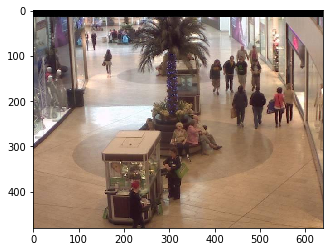

In [25]:
import matplotlib.pyplot as plt
test2 = cv2.imread('/home/ankit/Desktop/mall_dataset/frames/seq_001582.jpg')  
haar_face_cascade = cv2.CascadeClassifier('/home/ankit/Desktop/face.xml')
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

In [20]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)